In [3]:
import numpy as np
from scipy.special import jv
import matplotlib.pyplot as plt
%matplotlib inline

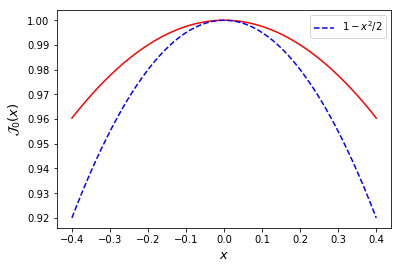

In [294]:
x=np.linspace(-0.4,0.4,5000)
bessel= jv(0,x)
plt.plot(x, bessel, 'r')
plt.plot(x, 1-0.5*x**2, 'b--', label='$1-x^2/2$')
plt.ylabel("$\mathcal{J}_0(x)$", fontsize=13)
plt.xlabel("$x$",fontsize=13)
plt.legend()
plt.savefig("bessel_fun_zoom.eps")

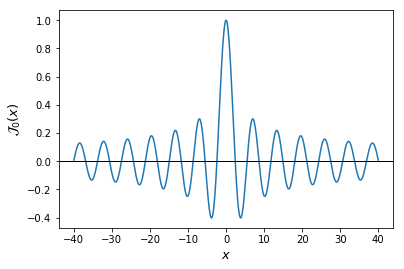

In [292]:
x=np.linspace(-40,40,5000)
bessel= jv(0,x)
plt.plot(x, bessel)
plt.ylabel("$\mathcal{J}_0(x)$", fontsize=13)
plt.xlabel("$x$",fontsize=13)
plt.axhline(linewidth=1, color='k')
plt.savefig("bessel_fun.eps")

### Solving linear equations
$AX=B$

In [9]:
a = np.array([[3,1], [1,2]])
b = np.array([9,8])
x = np.linalg.solve(a, b)
print x

[ 2.  3.]


In [10]:
np.dot(a, x)

array([ 9.,  8.])

In [99]:
def j_index(L):
    return np.linspace(-0.5*L,0.5*L, L+1)

In [225]:
def A_array_bc(L,J, lamda):
    diag_temp= 6*J**2+ lamda**2
    diag=diag_temp*np.identity(L+1) # L+1
    diag[0,0]=0.0; diag[L, L]=0.0
    off_diag_temp_left= -3*J**2*np.ones(L)# one less # j-1 side
    off_diag_temp_right= -3*J**2*np.ones(L)# one less # j+1 side
    off_diag_temp_left[0]=0.0 #dead BC
    off_diag_temp_right[-1]=0.0#dead BC
    off_diag=np.diag(off_diag_temp_left, -1)+ np.diag(off_diag_temp_right, 1)
    return off_diag+diag

In [142]:
def A_array(L,J, lamda):
    diag_temp= 6*J**2+ lamda**2
    diag=diag_temp*np.identity(L+1) # L+1
    off_diag_temp= -3*J**2*np.ones(L)# one less # j-1 side
    off_diag=np.diag(off_diag_temp, -1)+ np.diag(off_diag_temp, 1)
    return off_diag+diag
def B_array(L,J,lamda):
    return -J *np.ones(L+1)

In [194]:
L=4
J=1.0
lamda=5.0
A= A_array_bc(L,J, lamda)
print A

[[  0.  -3.   0.   0.   0.]
 [  0.  31.  -3.   0.   0.]
 [  0.  -3.  31.  -3.   0.]
 [  0.   0.  -3.  31.   0.]
 [  0.   0.   0.  -3.   0.]]


0.0

In [125]:
print diag[0,0], diag[4,4]
print diag

49.0 49.0
[[ 49.   0.   0.   0.   0.]
 [  0.  49.   0.   0.   0.]
 [  0.   0.  49.   0.   0.]
 [  0.   0.   0.  49.   0.]
 [  0.   0.   0.   0.  49.]]


In [268]:
from scipy.linalg import lstsq
L=1024
J=1.0
lamda=0.5
A= A_array_bc(L,J, lamda)
B= B_array(L,J, lamda)
alpha, res, rank, s = lstsq(A, B)

[]


In [274]:
L=1024
J=1.0
lamda=0.75
A= A_array(L,J, lamda)
B= B_array(L,J, lamda)
alpha_half =  lstsq(A, B)[0]

In [237]:
len(alp)

513

In [250]:
j_index_arr=j_index(L)

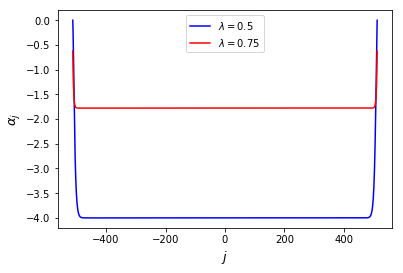

In [276]:
plt.plot(j_index_arr, alpha, 'b', label= r'$\lambda=0.5$')
plt.plot(j_index_arr, alpha_half, 'r', label= r'$\lambda=0.75$')
plt.legend(loc='best')
plt.ylabel(r'$\alpha_j$', fontsize=13)
plt.xlabel(r'$j$', fontsize=13)
plt.savefig("alpha_j_linear_potn.eps")

In [300]:
def J_eff_CD(J,alpha, lamba_dot):
    return J*(1+ (lamba_dot*alpha/J)**2)**0.5

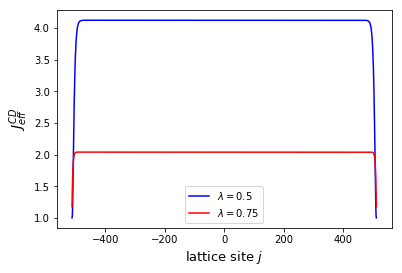

In [333]:
plt.plot(j_index_arr, J_eff_CD(1.0,alpha,1.0), 'b', label= r'$\lambda=0.5$')
plt.plot(j_index_arr, J_eff(1.0,alpha_half,1.0), 'r', label= r'$\lambda=0.75$')
plt.legend(loc='best')
plt.ylabel(r'$J^{CD}_{eff}$', fontsize=14)
plt.xlabel(r'lattice site $j$', fontsize=13)
plt.savefig("j_eff_cd.eps")

In [320]:
def driving_field_amplitude(J_eff_CD,L):
    J_floquet=np.max(J_eff_CD_arr)
    return np.sqrt(2)*L*(1-J_eff_CD/J_floquet)**0.5

In [336]:
J_eff_CD_arr=J_eff_CD(1.0,alpha,1.0)
J_floquet=np.max(J_eff_CD_arr)
driving_field_amplitude_half_lambda=driving_field_amplitude(J_eff_CD_arr, 1024)

In [322]:
J_eff_CD_arr=J_eff_CD(1.0,alpha_half,1.0)
driving_field_amplitude_threequart_lambda=driving_field_amplitude(J_eff_CD_arr,1024)

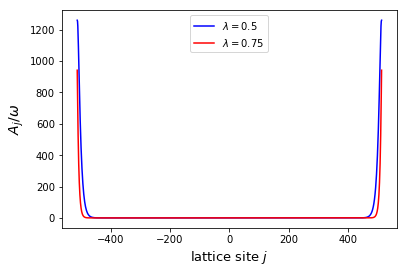

In [355]:
plt.plot(j_index_arr, driving_field_amplitude_half_lambda, 'b', label= r'$\lambda=0.5$')
plt.plot(j_index_arr,driving_field_amplitude_threequart_lambda, 'r', label= r'$\lambda=0.75$')
plt.legend(loc='best')
plt.ylabel(r'$A_{j}/ \omega$', fontsize=14)
plt.xlabel(r'lattice site $j$', fontsize=13)
plt.savefig("driving_field_amplitude.eps")

In [ ]:
def deriv(y,x):
    dy = np.zeros(len(y),np.float)
    dy[0:-1] = np.diff(y)/np.diff(x)
    dy[-1] = dy[-2]#(np.log(y[-1]) - np.log(y[-2]))/(np.log(x[-1]) - np.log(x[-2])) #last two elements are same
    return dy

In [351]:
bessel_half_lamba= jv(0,np.diff(driving_field_amplitude_half_lambda))
bessel_threequart_lamba= jv(0,np.diff(driving_field_amplitude_threequart_lambda))

In [349]:
J_eff_CD_arr=J_eff_CD(1.0,alpha,1.0)
J_floquet_half_lamba=np.max(J_eff_CD_arr)
J_eff_CD_arr=J_eff_CD(1.0,alpha_half,1.0)
J_floquet_threequart_lamba=np.max(J_eff_CD_arr)

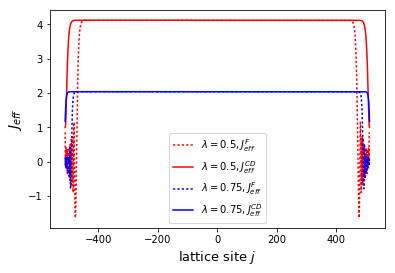

In [357]:
plt.plot(j_index_arr[0:-1], J_floquet_half_lamba*bessel_half_lamba, 'r:',label= r'$\lambda=0.5, J^{F}_{eff}$')
plt.plot(j_index_arr, J_eff_CD(1.0,alpha,1.0), 'r-', label= r'$\lambda=0.5, J^{CD}_{eff}$')
plt.plot(j_index_arr[0:-1], J_floquet_threequart_lamba*bessel_threequart_lamba, 'b:',label= r'$\lambda=0.75, J^{F}_{eff}$')
plt.plot(j_index_arr, J_eff(1.0,alpha_half,1.0), 'b', label=r'$\lambda=0.75, J^{CD}_{eff}$')
plt.ylabel(r'$J_{eff}$', fontsize=14)
plt.xlabel(r'lattice site $j$', fontsize=13)
plt.legend(loc='best')
plt.savefig("j_eff_f.eps")

### Eckart potential
$V(\lambda,j) = \lambda(t)/(\cosh^2 j/ \xi)$

In [359]:
def eckart_potential(lamba, x, xi):
    return lamba/np.cosh(x/xi)**2

In [361]:
L=1024
lamba=1.0
xi=8.0
x=np.linspace(-L/2, L/2, L+1)

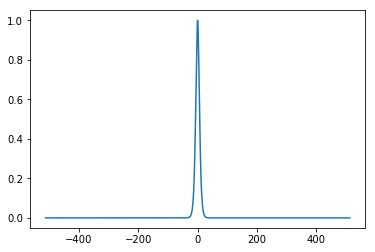

In [362]:
plt.plot(x, eckart_potential(lamba,x,xi))